In [27]:
import sys
%matplotlib inline

sys.path.append("/Users/maithoma/work/github/bayesLearn/scripts/")


try:
    reload(bayesLib)
except:
    import bayesLib

from bayesLib import *

In [2]:
def rankorder(x):
	x1 = list(np.sort(x))
	x1.reverse()
	y1 = range(1,len(x1)+1)
	return np.array(x1),np.array(y1)

In [11]:
def binning(x,y,bins,log_10=False,confinter=5):
    '''makes a simple binning'''

    x = np.array(x);y = np.array(y)

    if isinstance(bins,int) or isinstance(bins,float):
        bins = np.linspace(np.min(x)*0.9,np.max(x)*1.1,bins)
    else:
        bins = np.array(bins)

    if log_10:
        bins = bins[bins>0]
        c = x > 0
        x = x[c]
        y = y[c]
        bins = np.log10(bins)
        x = np.log10(x)
        y = np.log10(y)

    Tbins = []
    Median = []
    Mean = []
    Sigma =[]
    Perc_Up = []
    Perc_Down = []
    Points=[]


    for i,ix in enumerate(bins):
        if i+2>len(bins):
            break

        c1 = x >= ix
        c2 = x < bins[i+1]
        c=c1*c2

        if len(y[c])>0:
            Tbins = np.append(Tbins,np.median(x[c]))
            Median =  np.append(Median,np.median(y[c]))
            Mean = np.append(Mean,np.mean(y[c]))
            Sigma = np.append(Sigma,np.std(y[c]))
            Perc_Down = np.append(Perc_Down,np.percentile(y[c],confinter))
            Perc_Up = np.append(Perc_Up,np.percentile(y[c],100 - confinter))
            Points = np.append(Points,len(y[c]))


    return {'bins' : Tbins,
            'median' : Median,
            'mean' : Mean,
            'stdDev' : Sigma,
            'percDown' :Perc_Down,
            'percUp' :Perc_Up,
            'nPoints' : Points}

### [in fact, at each submission, we observe the outcome of a (multiplicative?) process which leads to a power law distribution of coarse-grained increments between k and k+1]


In [5]:
fig_width_pt = 420.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0 / 72.27  # Convert pt to inch
golden_mean = (np.sqrt(5) - 1.0) / 2.0  # Aesthetic ratio
fig_width = fig_width_pt * inches_per_pt  # width in inches
fig_height = fig_width  # *golden_mean      # height in inches
fig_size = [fig_width, fig_height]

params = {'backend': 'ps',
          'axes.labelsize': 25,
          'text.fontsize': 32,
          'legend.fontsize': 18,
          #'title.fontsize': 20,
          'xtick.labelsize': 20,
          'ytick.labelsize': 20,
          'text.usetex': False,
          'figure.figsize': fig_size}
pl.rcParams.update(params)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [7]:
simplName = "simpleConvergenceMeans"
complName = "complexConvergenceMeans"

In [8]:
simpl = open(dir + "Data/simpleConvergenceMeans.csv",'rb').read().split(",")
compl = open(dir + "Data/complexConvergenceMeans.csv",'rb').read().split(",")
learn13 = open(dir + "Data/person13Learning.csv",'rb').read().split("\n")
explor = open(dir + "Data/exploration.csv",'rb').read().split("\n")


for l,line in enumerate(learn13):
    #print line.split(",")
    try:
        learn13[l] = map(float,line.split(","))
    except:
        print line
        
learn13 = np.array(learn13)

dfSimpleLearning = pandas.DataFrame.from_csv(dir + "Data/simple_distances.csv")#simple 
dfComplexLearning = pandas.DataFrame.from_csv(dir + "Data/complex_distances_2.csv")# complex

dfExplor = pandas.DataFrame.from_csv(dir + "Data/exploration.csv")
dfExplor = dfExplor[:-1]

#df = dfAllLearning
#df.index = map(int,df.index)

### 1. Power Law Decay of JS-Distance

max:  0.657102661399 0.966666666667
0 LinregressResult(slope=-0.10433465469114427, intercept=-0.18984733144184873, rvalue=-0.91877362668368567, pvalue=0.0, stderr=0.00091895021952926258)
max:  0.677869829794 4.43333333333
1 LinregressResult(slope=-0.071619943085651616, intercept=-0.16648674544497355, rvalue=-0.93836929255804069, pvalue=0.0, stderr=0.00056013956565490006)


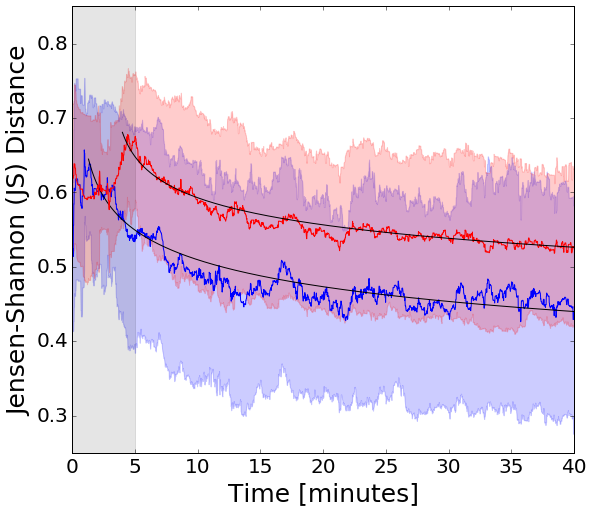

In [28]:
simple_distances = loadDistances(treatment="simple",remove_duplicates=False)
complex_distances = loadDistances(treatment="complex",remove_duplicates=False)

pl.figure(1,(9,8))
color = ["blue","red"]
tc = [0.3,3]
for k,kx  in enumerate([simple_distances,complex_distances][:]):
    #array = np.array(dfSimpleLearning)

    array = np.array(kx)
    X = []
    Y = []
    mean = []
    median = []
    std = []
    points = []
    percDown = []
    percUp = []
    
    for i,ix in enumerate(array):
        cond = np.logical_not(np.isnan(ix))
        
        if not len(ix[cond]):
            continue
        
        y = ix[cond]
        x = np.zeros_like(y)+i
        X = np.append(X,x)
        Y = np.append(Y,y)
        median = np.append(median,np.median(ix[cond]))
        mean  = np.append(mean,np.mean(ix[cond]))
        std = np.append(std,np.std(ix[cond]))
        points = np.append(points,float(len(ix[cond])))
        percDown = np.append(percDown,np.percentile(ix[cond],1))
        percUp = np.append(percUp,np.percentile(ix[cond],99))
      
    #print y
    #pl.figure(3)
    #B = binning(X,Y,500)
    #pl.plot(B['bins'],B['mean'],'.',color=color[k])
    
    print "max: ",np.max(mean),np.argmax(mean)/60.
    
    pl.figure(1)
    t = np.arange(1,len(mean)+1)/60.
    pl.plot(t,mean,color=color[k])
    pl.fill_between(t,mean-std,mean+std,color=color[k],alpha = 0.2)
    #pl.plot(t,percDown,'-.',color=color[k])
    #pl.plot(t,percUp,'-.',color=color[k])
    
    xShade = np.arange(0,6)
    pl.fill_between(xShade,np.zeros_like(xShade),np.zeros_like(xShade)+1,color="k",alpha=0.05)
    
    
    
    for j,jx in enumerate([mean,percDown,mean-std,mean+std][:1]):
        t = t - tc[k] + 1
        y = jx
        cond = (t > 1)*(y > 0)
        lt = np.log10(t[cond])
        ly = np.log10(y[cond])

        fit = S.linregress(lt,ly)
        print k,fit

        pl.plot(10**lt+tc[k],10**(lt*fit[0]+fit[1]),'k-')

    
pl.figure(1)    
pl.xlabel("Time [minutes]")
pl.ylabel("Jensen-Shannon (JS) Distance")
pl.xlim(0,40)
pl.ylim(0.25,0.85)
pl.savefig(dir + "Figures/decay_simple_complex.eps")

### Distribution of JS distance Jump Sizes

In [29]:
simple_distances = loadDistances(treatment="simple",remove_duplicates=True)
complex_distances = loadDistances(treatment="complex",remove_duplicates=True)


simple treatment
-0.000296869142072
[-0.00858985  0.00362277]
[-0.07715933  0.07408936]
[-0.19463969  0.26768895]
negative JS distance: 
LinregressResult(slope=-1.1376997680202301, intercept=-4.3384976872484806, rvalue=-0.90394660040574648, pvalue=1.4636579928606664e-37, stderr=0.054649070370008178)
positive JS distance: 
LinregressResult(slope=-1.3252812126767206, intercept=-4.8593588924480944, rvalue=-0.91965782761845849, pvalue=6.2178641597295249e-40, stderr=0.058371592271272706)

complex treatment
-1.11022302463e-16
[-0.00245531  0.00064251]
[-0.03746514  0.0273682 ]
[-0.10313744  0.15241029]
negative JS distance: 
LinregressResult(slope=-1.2335044852597559, intercept=-4.8519504210272144, rvalue=-0.9275785664386339, pvalue=2.7225957855814992e-58, stderr=0.043245673537344563)
positive JS distance: 
LinregressResult(slope=-1.3850526340150842, intercept=-5.2272899490019498, rvalue=-0.94251877660037786, pvalue=2.1217279687713227e-60, stderr=0.04427609647720842)


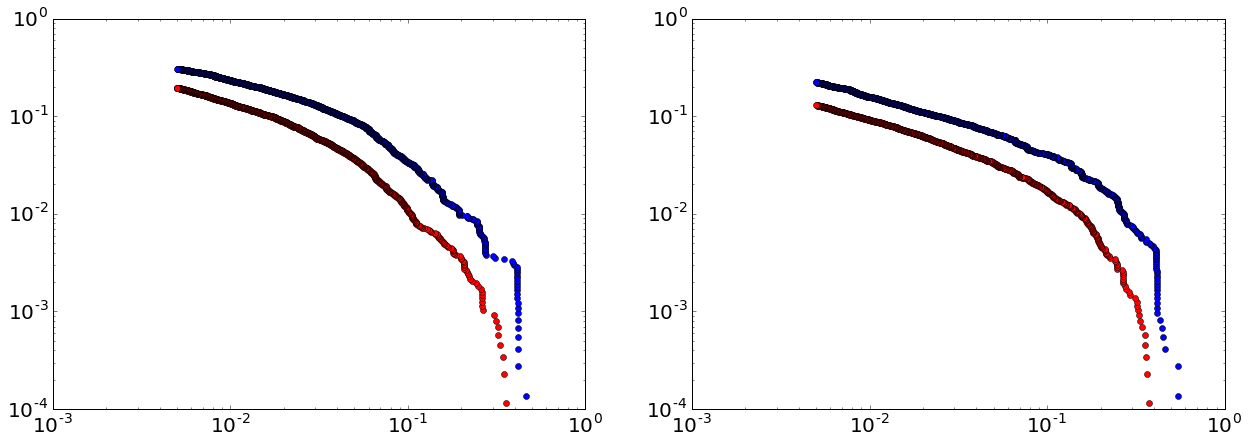

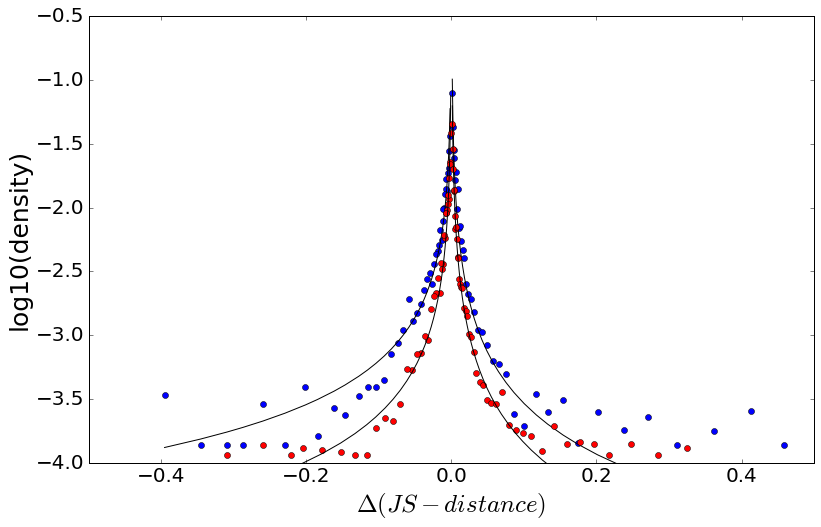

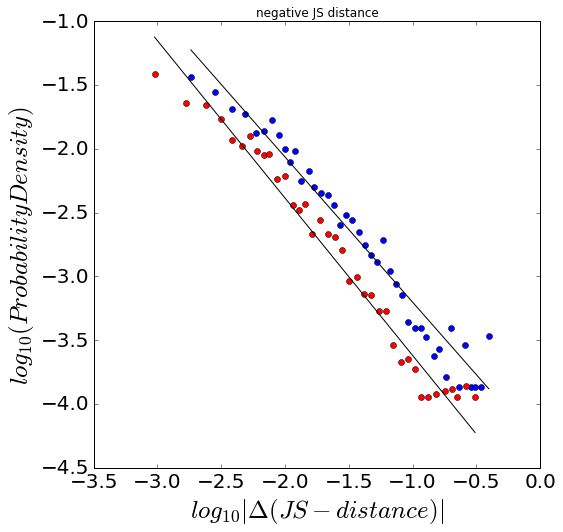

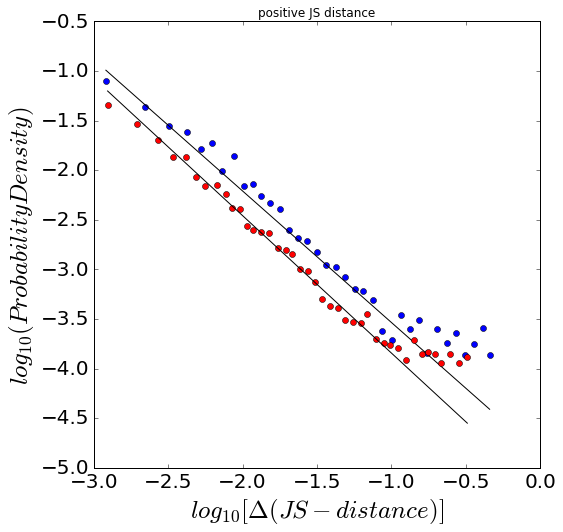

In [116]:
numbins = 50
#pl.figure(1,(9,7))
color = ["blue","red"]
for k,kx  in enumerate([simple_distances,complex_distances][:]):
    
    if k==0:
        print "\nsimple treatment"
    elif k == 1:
        print "\ncomplex treatment"
 

    array = np.array(zip(*np.array(kx)))
    
    deltaJSd = [] 
    for i,ix in enumerate(array):
        cond = np.logical_not(np.isnan(ix))
        
        if not len(ix[cond]):
            continue
            
        y = np.diff(ix[cond])
        deltaJSd = np.append(deltaJSd,y)
    
    
    #cond = (deltaJSd < 0)*(deltaJSd >= -0.01)
    #deltaJSd[cond] = 0.00
    
    #cond = (deltaJSd > 0)*(deltaJSd <= 0.01)
    #deltaJSd[cond] = 0.00
    
    pl.figure(1,(21,7))

    pl.subplot(121)
    x,y = rankorder(-deltaJSd)
    cond = x > 0.005
    pl.loglog(x[cond],y[cond]/float(y[-1]),'o',color=color[k])
    
    pl.subplot(122)
    x,y = rankorder(deltaJSd)
    cond = x > 0.005
    pl.loglog(x[cond],y[cond]/float(y[-1]),'o',color=color[k])
    

    
    
    
    pl.figure(2,(13,8))
    pl.xlabel("$\Delta(JS-distance)$")
    pl.ylabel("log10(density)")
    pl.xlim(-0.5,0.5)
    pl.ylim(-4,-0.5)
    
    
    H = np.histogram(deltaJSd,bins=1000)
    x = H[1][1:]
    y = H[0]/float(np.sum(H[0]))
    
    print np.median(deltaJSd)
    print np.percentile(deltaJSd,(25,75))
    print np.percentile(deltaJSd,(5,95))
    print np.percentile(deltaJSd,(1,99))
    
    # negative JS distance
    cond = (x < 0)*(y > 0)
    lx = np.log10(-x[cond])
    ly = np.log10(y[cond])
    condFit = (lx > -4.5)*(lx < -1.)
    #condFit = (lx > -3.5)*(lx < -2)
    fit = S.linregress(lx[condFit],ly[condFit])
    print "negative JS distance: \n" , fit
    B = binning(lx,ly,numbins)
    #pl.plot(x[cond],ly,'o',color=color[k])
    pl.plot(-10**B['bins'],B['mean'],'o',color=color[k])
    
    #pl.plot(-10**B['bins'],B['percUp'],'-',color=color[k])
    #pl.plot(-10**B['bins'],B['percDown'],'-',color=color[k])
    
    pl.plot(-10**B['bins'],B['bins']*fit[0]+fit[1],'k-')

    
    pl.figure(3,(8,8)) ## loglog panel negative JS distance
    pl.title("negative JS distance")
    #pl.plot(lx,ly,'k.',color=color[k])
    pl.plot(B['bins'],B['mean'],'o',color=color[k])    
    pl.plot(B['bins'],B['bins']*fit[0]+fit[1],'k-')
    pl.xlabel("$log_{10}|\Delta(JS-distance)|$")
    
    pl.ylabel("$log_{10}(Probability Density)$")

    
    # positive JS distance
    pl.figure(2)
    cond = (x > 0)*(y > 0)
    lx = np.log10(x[cond])
    ly = np.log10(y[cond])
    condFit = (lx > -4.5)*(lx < -1.)
    #condFit = (lx > -3.5)*(lx < -2)
    fit = S.linregress(lx[condFit],ly[condFit])
    
    print "positive JS distance: \n" , fit
    B = binning(lx,ly,numbins)
    #pl.plot(x[cond],ly,'o',color=color[k])
    pl.plot(10**B['bins'],B['mean'],'o',color=color[k])
    
    #pl.plot(10**B['bins'],B['percUp'],'-',color=color[k])
    #pl.plot(10**B['bins'],B['percDown'],'-',color=color[k])
    
    pl.plot(10**B['bins'],B['bins']*fit[0]+fit[1],'k-')
    
    
    pl.figure(4,(8,8)) ## loglog panel positive JS distance
    pl.title("positive JS distance")
    pl.plot(B['bins'],B['mean'],'o',color=color[k])
    pl.plot(B['bins'],B['bins']*fit[0]+fit[1],'k-')
    pl.xlabel("$log_{10}[\Delta(JS-distance)]$")
    pl.ylabel("$log_{10}(ProbabilityDensity)$")
    

pl.figure(2)
pl.savefig(dir + "Figures/pdfJSD.eps")
pl.figure(3)
pl.savefig(dir + "Figures/pdfJSD_loglog_negative.eps")

pl.figure(4)
pl.savefig(dir + "Figures/pdfJSD_loglog_positive.eps")

In [525]:
pl.figure(1,(13,7))
DF = DF[DF!=0]
H = pl.histogram(DF,bins = 100)
x = H[1][:-1]
print np.mean(x)
dSize = x[-1] - x[-2]
y = H[0]
c = y > 0
x = x[c]
y = y[c]
print x[np.argmax(y)],y[np.argmax(y)]/float(np.sum(y))
print np.mean(x)
y = y/float(np.sum(y))
ly = np.log10(y)
print np.min(ly),np.max(ly)
#pl.bar(x,ly -min(ly),dSize,bottom=np.min(ly))
pl.plot(x,ly,'bo')
pl.xlabel("delta distance between 2 steps")
pl.ylabel("log10(density)")

pl.figure(4,(9,8))
pl.xlabel("delta distance between 2 steps")
pl.ylabel("log10(density)")

#Fit negative part
#cMinus = (x < -0.0001)*(y > 0)
cMinus = (x > -1.3)*(x < 0)#*(y > 5e-10)
print "highest density", max(y),x[np.argmax(y)]
lx = np.log10(-x[cMinus])
ly = np.log10(y[cMinus])
print len(lx),len(ly)
fitNeg = S.linregress(lx,ly)

print fitNeg

pl.figure(2,(9,8))
#pl.subplot(121)
#pl.title("performance")

pl.plot(lx,ly,'go')
pl.plot(lx,lx*fitNeg[0] + fitNeg[1],'k-',lw=1.5)
pl.xlabel("log10(-delta distance between 2 steps)")
pl.ylabel("log10(density)")
#pl.text(-1.4,-2.5,"best fit: %.2f (std.err = %.2f)"%(fit[0],fit[4]),color="green")
pl.savefig(dir + "Figures/subplot1.eps")

pl.figure(1)
pl.plot(x[cMinus],ly,'go')
yFit = fitNeg[0]*np.log10(-x) + fitNeg[1]
pl.plot(x,yFit,'k-',lw=1.5)
pl.text(-0.5,-3,"best fit: %.2f (std.err = %.2f)"%(fitNeg[0],fitNeg[4]),color="green")

pl.figure(4)
pl.plot(-x[cMinus],ly,'go')
pl.plot(-x,yFit,'g-',lw=1.5)

pl.figure(2,(9,8))
#pl.title("counter performance")

#c = (x > 0.00)*(y > 5e-5)

c = (x > 0.00)*(y > 0)
lx = np.log10(x[c])
ly = np.log10(y[c])
print len(lx),len(ly)
fitPos = S.linregress(lx,ly)
print fitPos
pl.plot(lx,ly,'ro')
pl.plot(lx,lx*fitPos[0] + fitPos[1],'k-',lw=1.5)
pl.xlabel("log10(delta distance between 2 steps)")
pl.ylabel("log10(density)")
#pl.text(-2,-3,"best fit: %.2f (std. err. = %.2f)"%(fit[0],fit[4]),color="red")
pl.savefig(dir + "Figures/subplot2.eps")


pl.figure(1)
pl.plot(x[c],ly,'ro')
pl.plot(x,fitPos[0]*np.log10(x) + fitPos[1],'k-',lw=1.5)
pl.text(0.2,-3,"best fit: %.2f (std. err. = %.2f)"%(fitPos[0],fitPos[4]),color="red")
axY = np.linspace(-5,1,10)
pl.plot(np.zeros_like(axY),axY,'k-',lw=1.5)
pl.ylim(ymax=1)
pl.savefig(dir + "Figures/performance.eps")

pl.figure(4)
pl.plot(x[c],ly,'rs')
pl.plot(x,fitPos[0]*np.log10(x) + fitPos[1],'r-',lw=1.5)
pl.savefig(dir + "Figures/performance_superimpose.eps")

#print fitNeg
#print fitPos

pl.figure(5,(9,8))
x = np.linspace(0,0.7,20)
yPos = fitPos[0]*np.log10(x) + fitPos[1]
yNeg = fitNeg[0]*np.log10(x) + fitNeg[1]
ly = yNeg - yPos
print "diff:", fitNeg[0] - fitPos[0]
pl.plot(x,ly,'k-',lw=1.5)
pl.plot(x,np.zeros_like(x),'k-')

pl.xlabel("log10(delta distance between 2 steps)")
pl.ylabel("log10[diff(density)]")

NameError: name 'DF' is not defined

### Exploration versus Performance

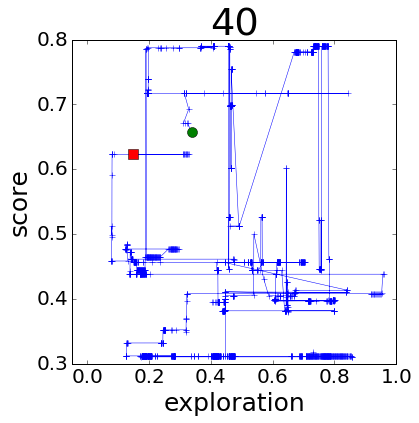

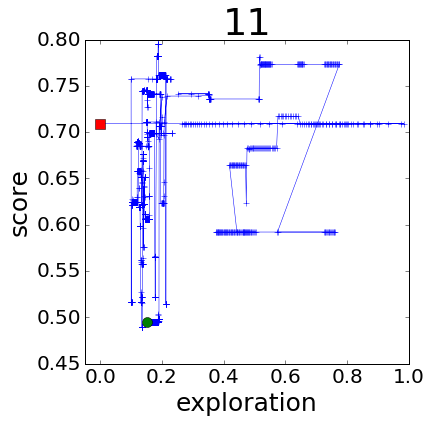

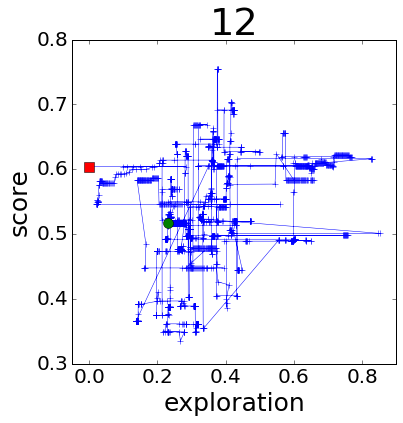

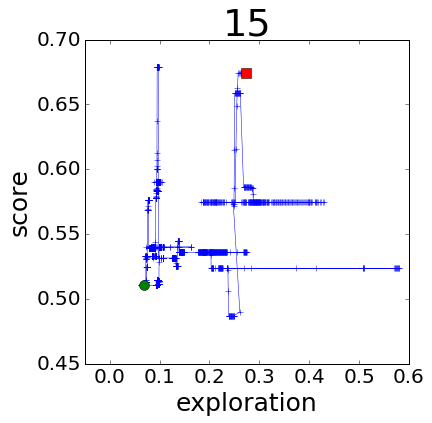

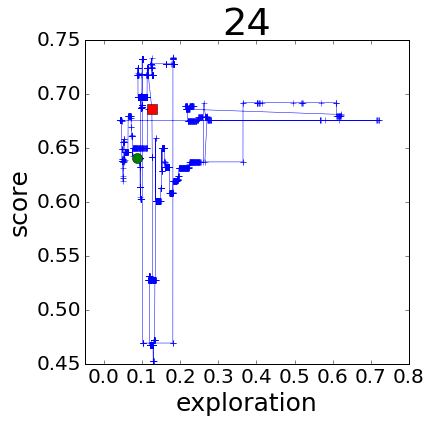

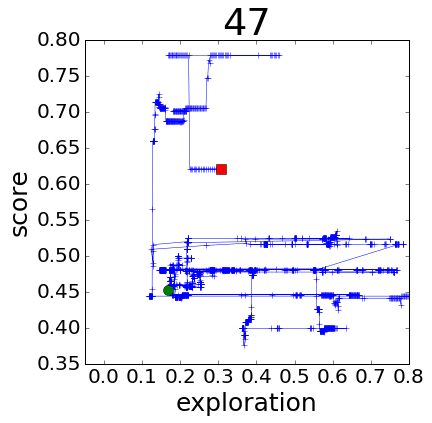

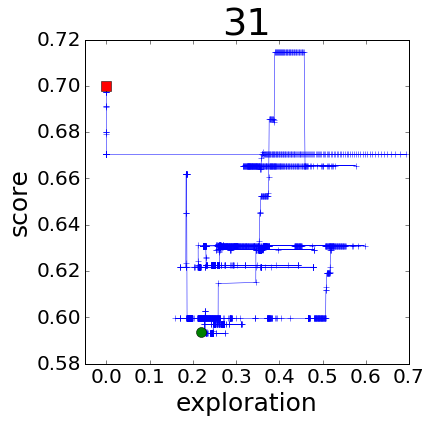

In [33]:
for i in range(48):
    score = dfAllLearning[str(i)].values[:]
    explor = dfExplor[str(i+1)].values[:]
    
    c = (~np.isnan(score))*(~np.isnan(explor))
    
    if i in [11,12,15,24,31,40,47]:
    #if i in np.arange(47,48):
        pl.figure(i)
        pl.title(i)
        pl.plot(explor[c],score[c],'+-',lw=0.5)
        pl.plot(explor[c][0],score[c][0],'rs',ms=10)
        pl.plot(explor[c][-1],score[c][-1],'go',ms=10)
        #break
        
        pl.xlabel("exploration")
        pl.ylabel("score")
        pl.xlim(xmin = -0.05)
        
        pl.savefig(dir + "Figures/score_explor_walk_%s.eps"%i)

### Explore vicinity of new information

* stack the minute before : look at perturbations
* stack the minute after : look at perturbations


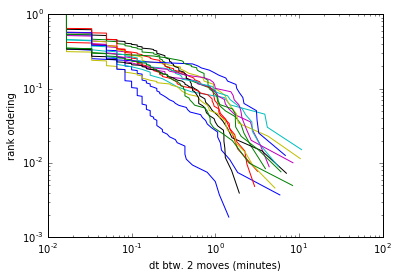

In [8]:
DF = []
#pl.figure(1,(15,10))
#pl.figure(3,(9,8))

for i in range(48):
    values = df[str(i)].values[:]
    values = values[np.invert(np.isnan(values))]
    DF = np.append(DF,np.diff(values))#/values[:-1])
    minimum = min(values[-50:])
    #print i,minimum
    #if minimum <= 0.30:
    
    x = df[str(i)].index[:-1]/60.
    y = np.diff(df[str(i)])
      
    if i==[11,12,15,24,31,40][5]:
        #pl.plot(df[str(i)],label=str(i))
        
        #pl.figure(1)
        cPlus = y > 0.001
        #pl.plot(x[cPlus],y[cPlus],'r.',label=str(i))
        cMinus = y < -0.001
        #pl.plot(x[cMinus],-y[cMinus],'g.',label=str(i))
    
    lastScore = df[str(i)].values[-1]
    
    
    if ~np.isnan(lastScore) and lastScore < 0.5:
    
        pl.figure(3)
        c = (y != 0)*(~np.isnan(y))*(np.abs(y) > 0.00)
        
        xRo,yRo = rankorder(np.diff(np.sort(x[c])))
        try:
            pl.loglog(xRo,yRo/float(yRo[-1]))
        except:
            continue

yline = np.linspace(-0.7,0.7,10)        
T = np.arange(0,44,1)
for i in T:
    xline = np.zeros_like(yline) + i
    #pl.figure(1)
    #pl.plot(xline,yline,'k:')

    #pl.figure(2)
    xStack = x[c] - i
    yStack = y[c]

        
    cPlus = yStack > 0.001
    cMinus = yStack < -0.001
    cStack = (xStack > -0.5)*(xStack < 0.5)
    #xStack = xStack[cStack]
    #yStack = yStack[cStack]

    #pl.plot(xStack[cStack*cPlus],yStack[cStack*cPlus],'r.')
    #pl.plot(xStack[cStack*cMinus],-yStack[cStack*cMinus],'g.')
    
    #try:
    #    pl.figure(3)
    #    B = binning(xStack,yStack,30)
    #    pl.plot(B['bins'],B['nPoints'],'ro')
    #except:
    #    continue

#pl.figure(1)
#x0 = np.linspace(0,40,100)
#y0 = np.zeros_like(x0)
#pl.semilogy(x0,y0,'k-')
#pl.ylabel("dis-performance")
#pl.legend(loc=0)
#pl.ylim(0,0.5)
#pl.xlim(15,30)

#pl.figure(2)
#pl.plot(x0,y0,'k-')
#xline = np.zeros_like(yline)
#pl.plot(xline,yline,'k:')
#pl.xlim(-1,1)
#pl.ylim(ymin=0)

pl.figure(3)
pl.xlabel("dt btw. 2 moves (minutes)")
pl.ylabel("rank ordering")

In [11]:
simpl  = [float(x) for x in simpl]
x = np.arange(1,len(simpl)+1)
compl  = [float(x) for x in compl]

In [43]:
def prepareXY(filename,log=False):
    stringData = open(dir + "Data/%s.csv"%filename,'rb').read().split(",")
    Y = np.array([float(x) for x in stringData ])
    X = np.arange(1,len(Y)+1)
    
    if log:
        c = Y >0
        Y = np.log10(Y[c])
        X = np.log10(X[c])  
    return X,Y

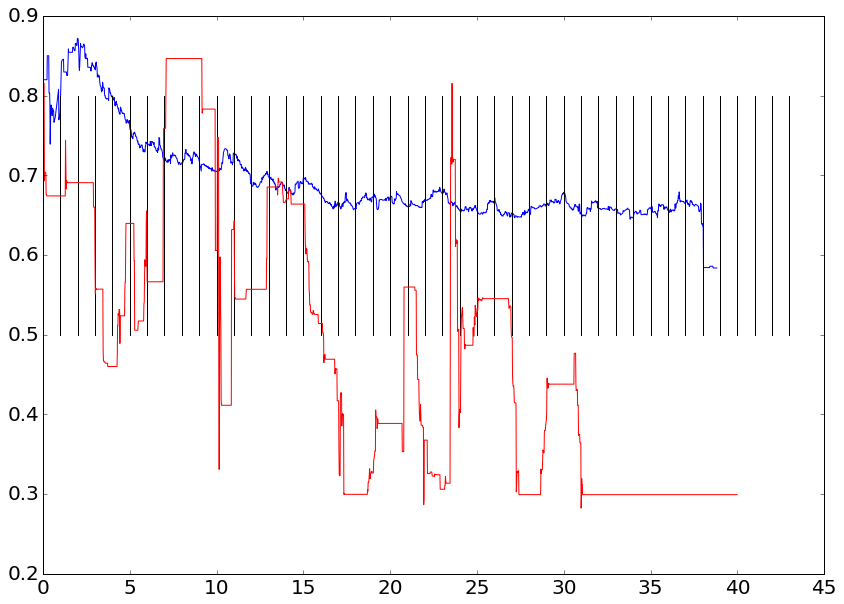

In [50]:
filename = complName
x,y = prepareXY(filename,log=False)
x = x/60.

pl.figure(1,(14,10))
pl.plot(x,y)

yline = np.linspace(0.5,0.8,10)


T = np.arange(0,44,1)
for i in T:
    xline = np.zeros_like(yline) + i
    pl.plot(xline,yline,'k-')
    
#pl.ylim(0.5,0.8)

pl.plot(learn13[:,0]/60.,learn13[:,1],'r-')

LinregressResult(slope=-0.093095490681215573, intercept=-0.1215610783049937, rvalue=-0.92191054796212424, pvalue=0.0, stderr=0.00078810173292323494)
LinregressResult(slope=-0.087805313813836827, intercept=-0.056609869121337364, rvalue=-0.94593012685034195, pvalue=0.0, stderr=0.00063237876503775435)


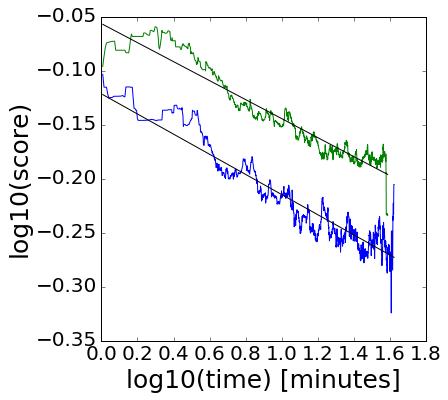

In [41]:
def plotFit(vector):
    '''Vector = {simpl,compl}'''
    y = np.array(map(float,vector))
    x = np.arange(1,len(vector)+1)/60.
    c = (x > 1)*(vector > 0)

    lx = np.log10(x[c])
    ly = np.log10(y[c])
    
    fit = S.linregress(lx,ly)
    print fit
    pl.plot(lx,ly)
    pl.plot(lx,lx*fit[0] + fit[1],'k-')
    
    pl.xlabel("log10(time) [minutes]")
    pl.ylabel("log10(score)")
    
    
plotFit(simpl)
plotFit(compl)

In [519]:
print 10**(-0.19)
print 10**(-0.17)

0.645654229035
0.676082975392


In [20]:
t = 60*24*365*275
print 0.65*t**(-0.10)
t = 60*24*365*900000
print 0.65*t**(-0.07)

#t = 60*24*1.29
#print 0.65*t**(-0.25)

0.0992920669873
0.099008049776


exponential:  LinregressResult(slope=-0.0019581915875417086, intercept=-0.21868757071667683, rvalue=-0.87369500116804444, pvalue=0.0, stderr=2.3804129612059063e-05)
LinregressResult(slope=-0.06412213760747254, intercept=-0.18010989709787842, rvalue=-0.96916389799821401, pvalue=0.0, stderr=0.00035594155312415843)


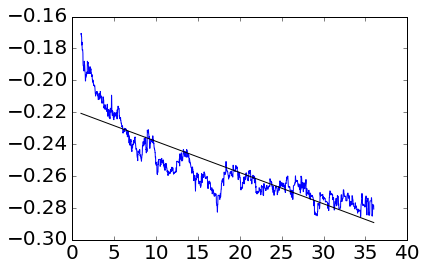

In [415]:
x = np.arange(1, len(mean) + 1)/60. -4
y = mean
cond = (x > 1)*( y > 0)
lx = np.log10(x[cond])
ly = np.log10(y[cond])
fitExp = S.linregress(x[cond],ly) 
print "exponential: ",fitExp
print S.linregress(lx,ly)

pl.plot(x[cond],ly)
pl.plot(x[cond],x[cond]*fitExp[0]+fitExp[1],'k-')
#pl.xlim(xmin=0)

In [421]:
simple_distances_unique = loadDistances(data="simple",remove_duplicates=True)

simple
LinregressResult(slope=0.0048888414617139532, intercept=0.0040142424729676107, rvalue=0.18691899067463633, pvalue=0.45767463751531245, stderr=0.0064234741902677323)
LinregressResult(slope=0.0097776880887809701, intercept=0.47788005333600597, rvalue=0.32243260526259176, pvalue=0.19191296741675634, stderr=0.0071762946016553615)
complex
LinregressResult(slope=0.0040087684692652484, intercept=0.0042050117708850258, rvalue=0.19488867594184564, pvalue=0.43836436035919402, stderr=0.0050437792153789855)
LinregressResult(slope=-0.019351338675019807, intercept=0.54710187984878711, rvalue=-0.4814230634923759, pvalue=0.043091830077970246, stderr=0.0088078575066249231)


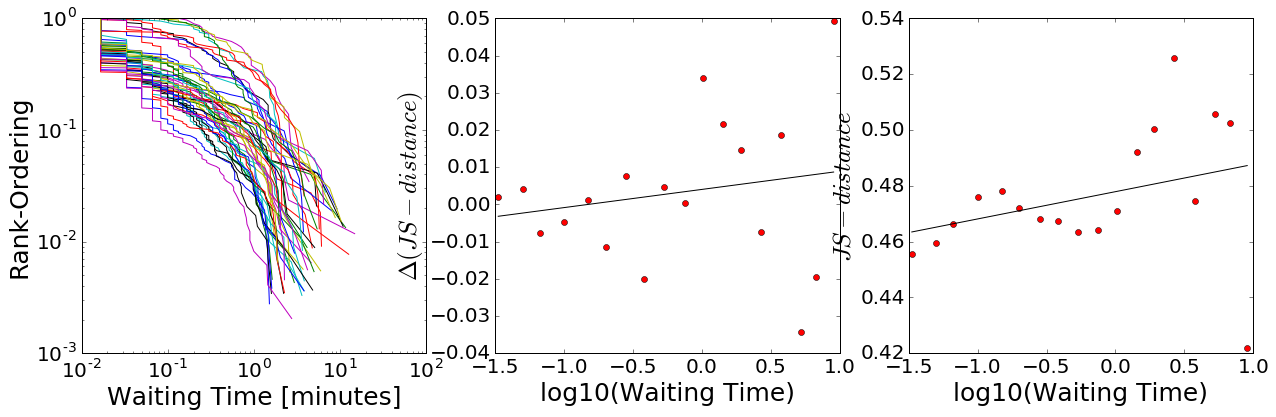

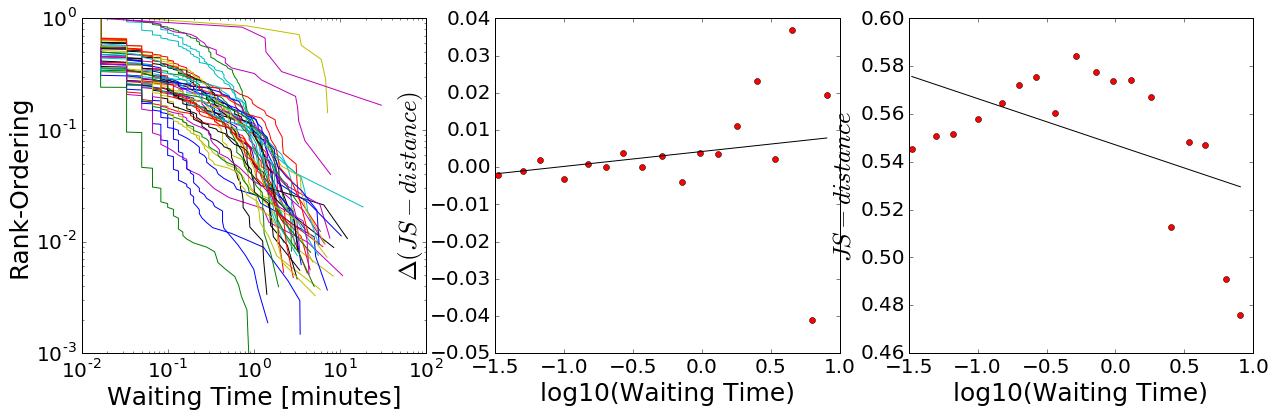

In [514]:
for i,datatype in enumerate(['simple','complex']):
#datatype = "complex"

    print datatype
    test_dic = dict(loadDistances(data=datatype,remove_duplicates=True))
    WT = []
    JS = []
    dJS = []
    
    pl.figure(i+1,(21,6))
    for key in test_dic.keys():
        test = np.array(test_dic[key])
        index = np.argwhere(test>0)
        wt = np.concatenate([np.diff(index.flatten())])/60.
        js = test[index].flatten()
        djs = np.diff(test[index].flatten())

        pl.subplot(131)
        x,y = rankorder(wt)
        pl.loglog(x,y/float(y[-1]))
        pl.xlabel("Waiting Time [minutes]")
        pl.ylabel("Rank-Ordering")
        pl.ylim(0.001,1)

        pl.subplot(132)
        #pl.semilogx(wt,djs,'.')
        pl.xlabel("log10(Waiting Time)")
        pl.ylabel("$\Delta(JS-distance)$")

        pl.subplot(133)
        #pl.semilogx(wt,js[1:],'.')
        pl.xlabel("log10(Waiting Time)")
        pl.ylabel("$JS-distance$")
        
        WT = np.append(WT,wt)
        JS = np.append(JS,js)
        dJS = np.append(dJS,djs)
    
    pl.subplot(132)
    cond = (WT > 0)*(WT < 10)
    lWT = np.log10(WT[cond])
    B = binning(lWT,dJS[cond],20)
    
    pl.plot(B['bins'],B['mean'],'ro')
    fitB = S.linregress(B['bins'],B['mean'])
    print fitB
    pl.plot(B['bins'],B['bins']*fitB[0] + fitB[1],'k-')
    
    pl.subplot(133)
    B = binning(lWT,JS[cond],20)
    pl.plot(B['bins'],B['mean'],'ro')
    fitB = S.linregress(B['bins'],B['mean'])
    print fitB
    pl.plot(B['bins'],B['bins']*fitB[0] + fitB[1],'k-')